In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib widget

In [53]:
cdata = pd.read_csv('games-features-metacritic-new.csv')
owners = pd.read_csv('steamspy_owners.csv')
scharts = pd.read_csv('Long_GamesData.csv')
# meta = pd.read_csv('steamspy_metascore.csv')

# meta = meta.rename(columns={'0':'MetaScore'})
owners = owners.rename(columns={'0':'Owners'})

scharts = scharts.rename(columns={'App_id':'QueryID'})
scharts = scharts[scharts.Avg_Players==1.0]

In [89]:
s1 = pd.merge(cdata, owners, how='inner', on=['QueryID'])
# s1 = pd.merge(s1, meta, how='inner', on=['QueryID'])

s1 = s1[s1.Owners>0]
s1 = s1[s1.Metacritic>0]
s1 = s1[~s1.IsFree]
s1 = s1[s1[['PriceInitial', 'PriceFinal']].mean(axis=1)>0.]

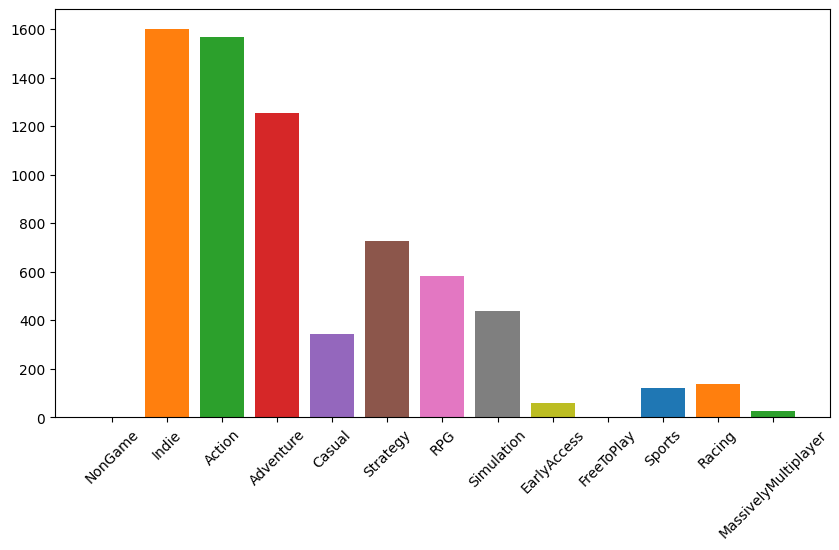

In [90]:
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(bottom=0.2)
genres = [i for i in s1.columns if 'Genre' in i]

total = 0
for i,g in enumerate(genres):
    ax.bar(i, s1[g].sum())
    total += s1[g].sum()
    
ax.set_xticks([i for i in range(len(genres))])
_ = ax.set_xticklabels([i.split('Is')[1] for i in genres], rotation=45)


In [91]:
# s1 = s1[s1.PCReqsHaveMin]

s1 = s1[['QueryID', 'QueryName', 'ReleaseDate', 'Metacritic', 'Owners', 'RecommendationCount', 'PackageCount', 'MovieCount', 
        'ScreenshotCount', 'DemoCount', 'AchievementCount', 'PriceInitial', 'PriceFinal']]

s1['PriceMean'] = s1[['PriceInitial', 'PriceFinal']].mean(axis=1)
s1['logOwners'] = np.log10(s1['Owners'])
s1['Revenue'] = s1['Owners']*s1['PriceMean']

s1['logRevenue'] = np.log10(s1['Revenue'])

In [92]:
s1 = s1[s1['ReleaseDate'] != ' ']

In [100]:
s1 = s1.replace({'ReleaseDate':'Spring 2017'}, '2017-03-01')
s1 = s1.replace({'ReleaseDate':'Early 2017'}, '2017-03-01')


In [101]:
s1['ReleaseDate'] = s1['ReleaseDate'].astype('datetime64')
s1['TodaysDate'] = datetime(2021, 5, 20)

s1['Age'] = ((s1.TodaysDate - s1.ReleaseDate)/np.timedelta64(1, 'M'))

s1 = s1.drop(labels=['ReleaseDate', 'TodaysDate'], axis=1)

In [106]:
%matplotlib widget

_ = pd.plotting.scatter_matrix(s1[['Age', 'Metacritic', 'PackageCount', 'MovieCount', 'ScreenshotCount', 'DemoCount', 'AchievementCount', 'PriceMean', 'Owners', 'logOwners', 'Revenue', 'logRevenue']], figsize=(10,10))

[a.set_xlabel(a.get_xlabel(), fontsize=5) for a in _.flatten()]
_ = [a.set_ylabel(a.get_ylabel(), fontsize=7) for a in _.flatten()]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [130]:
cdata[cdata['QueryID']==1259420]

,Unnamed: 0,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
48287,48287,1259420,1259420,Days Gone,Days Gone,May 17 2021,17,0,1,0,...,PRIVACY POLICYhttps://www.playstation.com/en-u...,,English* French* Italian* German* Spanish - Sp...,None,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...


In [126]:
s1.iloc[2725]

QueryID                  1259420
QueryName              Days Gone
Metacritic                    78
Owners                  185000.0
RecommendationCount            0
PackageCount                   1
MovieCount                     5
ScreenshotCount               14
DemoCount                      0
AchievementCount               0
PriceInitial               49.99
PriceFinal                 49.99
PriceMean                  49.99
logOwners               5.267172
Revenue                9248150.0
logRevenue              6.966055
Age                     0.098565
Name: 48287, dtype: object

In [121]:
fig, ax = plt.subplots(figsize=(12,5))
s = ax.scatter(s1['Age'], np.log(s1['Owners']), c=s1.logRevenue, alpha=0.5, cmap='YlOrRd')
ax.set_xlabel('Age of game (months)')
ax.set_ylabel('Game owners (log)')
c = fig.colorbar(s)
c.ax.set_ylabel("Lifetime Revenue (log)")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Lifetime Revenue (log)')

In [ ]:
s1[(s1['Age'] ]

# Models

In [10]:
s1.head()

,QueryID,QueryName,Metacritic,Owners,RecommendationCount,PackageCount,MovieCount,ScreenshotCount,DemoCount,AchievementCount,PriceInitial,PriceFinal,PriceMean,logOwners,Revenue,logRevenue
0,10,Counter-Strike,88,18429000.0,68991,1,0,13,0,0,9.99,9.99,9.99,7.265502,184105710.0,8.265067
2,30,Day of Defeat,79,6159000.0,2319,1,0,5,0,0,4.99,4.99,4.99,6.789510,30733410.0,7.487611
6,70,Half-Life,96,9167000.0,12486,1,0,11,0,0,9.99,9.99,9.99,6.962227,91578330.0,7.961793
7,80,Counter-Strike: Condition Zero,65,9173000.0,7067,1,0,8,0,0,9.99,9.99,9.99,6.962511,91638270.0,7.962077
8,80,Counter-Strike: Condition Zero,65,9173000.0,7067,1,0,8,0,0,9.99,9.99,9.99,6.962511,91638270.0,7.962077


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime

In [77]:
X = s1[['Age', 'Owners', 'PackageCount', 'MovieCount', 'ScreenshotCount', 'DemoCount', 'AchievementCount', 'PriceInitial', 'PriceFinal', 'PriceMean']].values
y = s1['Revenue']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=440)

In [79]:
X_test.shape

(769, 9)

In [80]:
tree = DecisionTreeRegressor()

In [81]:
tree.fit(X_train, y_train, )

DecisionTreeRegressor()

In [82]:
preds = tree.predict(X_test)

In [83]:
np.square(preds-y_test).mean()

209.76202860858257

In [84]:
fig, ax = plt.subplots()
ax.scatter(np.arange(len(preds)), preds, color='firebrick', alpha=0.6)
ax.scatter(np.arange(len(preds)), y_test, color='royalblue', alpha=0.6)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
ax.set_ylim([0,])

In [86]:
err = preds-y_test
fig, ax = plt.subplots()
_ = ax.hist(err, bins=100, edgecolor='k')
# ax.set_ylim([0,10])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Timeseries

In [56]:
ts = pd.merge(s1, scharts, how='inner', on=['QueryID'])


In [59]:
fig, ax = plt.subplots()

columnind = np.where(ts.columns=='April_2021')[0][0]
months = ts.columns.values[columnind:]

plotted = 0
for i in range(len(ts)):
    if not cdata[cdata['QueryID']==ts.loc[i]['QueryID']]['GenreIsIndie'].values[0]:
        continue
    vals = ts.loc[i].values[columnind:].astype(float)
    if not np.isfinite(vals).all():
        nanind = np.where(~np.isfinite(vals))[0][0]
    else:
        nanind = len(vals)
    ax.plot(vals[:nanind][::-1], label=ts['QueryName'][i])
    plotted += 1
    if plotted > 9:
        break
fig.legend(loc='upper center', fontsize=7)
_ = ax.set_xticklabels(months, rotation=90)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-59-3e0764f18712>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(months, rotation=90)
